Successfully loaded data from D:/data_for_seg/
False
False
Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Laurent\anaconda3\envs\organoids-project\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


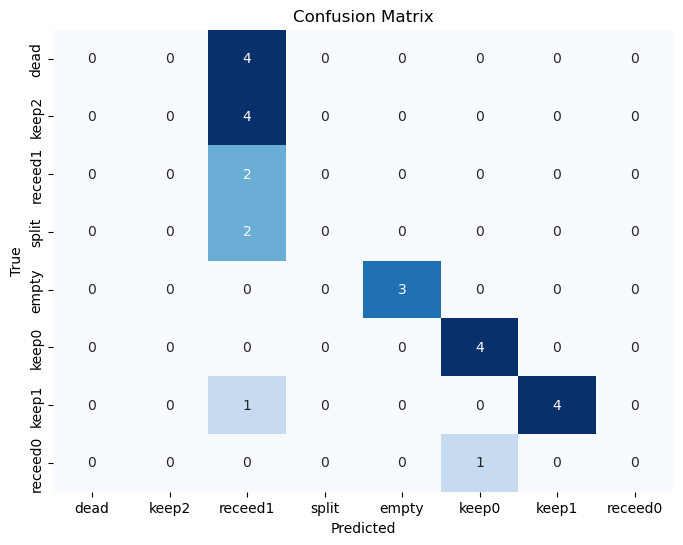

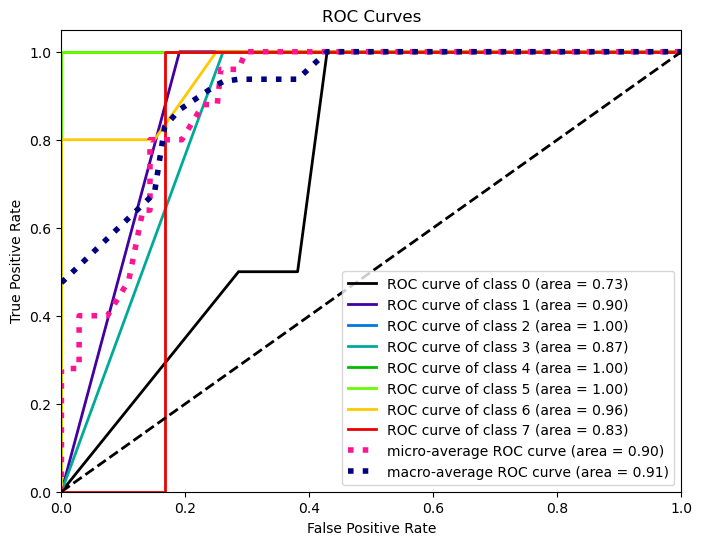

ROC AUC Score: 0.9117313664596273
Best Hyperparameters:
{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [16]:
from importlib import reload
import utility
reload(utility)
from utility import get_hard_disk_path, load_data, run_gridsearch_random_forest, evaluate_gridsearch

X, y, unique_labels, label_mapping, _ = load_data(get_hard_disk_path())
grid_search, X_test, y_test = run_gridsearch_random_forest(X, y, random_state=30)
auc_score, best_params = evaluate_gridsearch(grid_search, X_test, y_test, unique_labels)
print(f"ROC AUC Score: {auc_score}")
print("Best Hyperparameters:")
print(best_params)

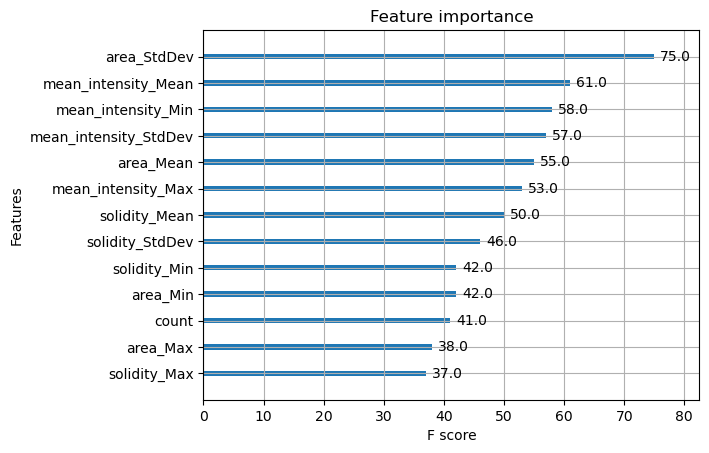

In [10]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(classifier)
plt.show()

Successfully loaded data from D:/data_for_seg/


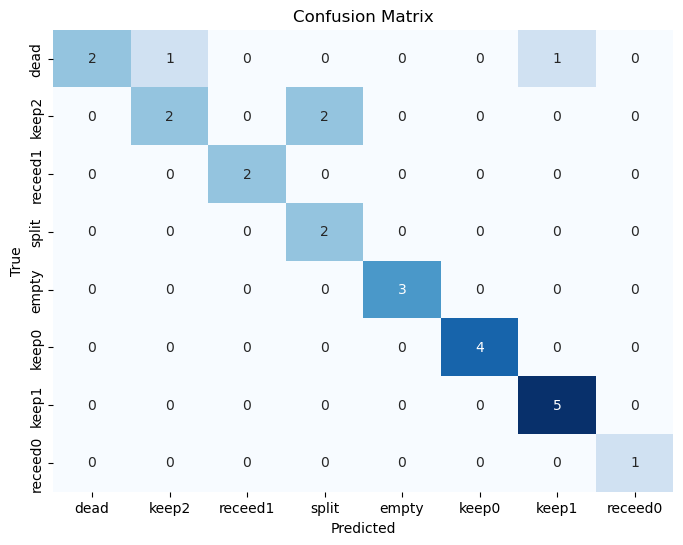

Successfully loaded data from D:/data_for_seg/


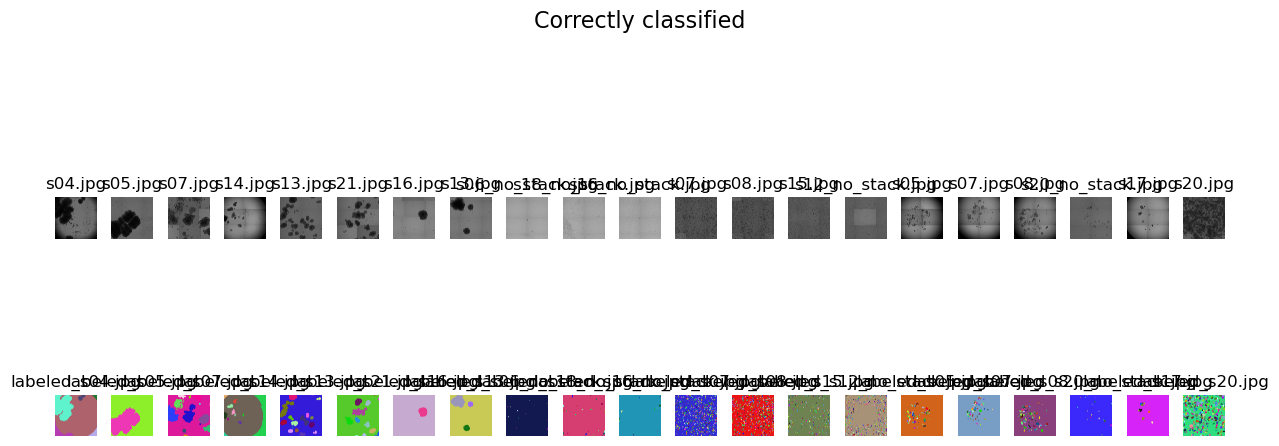

Successfully loaded data from D:/data_for_seg/


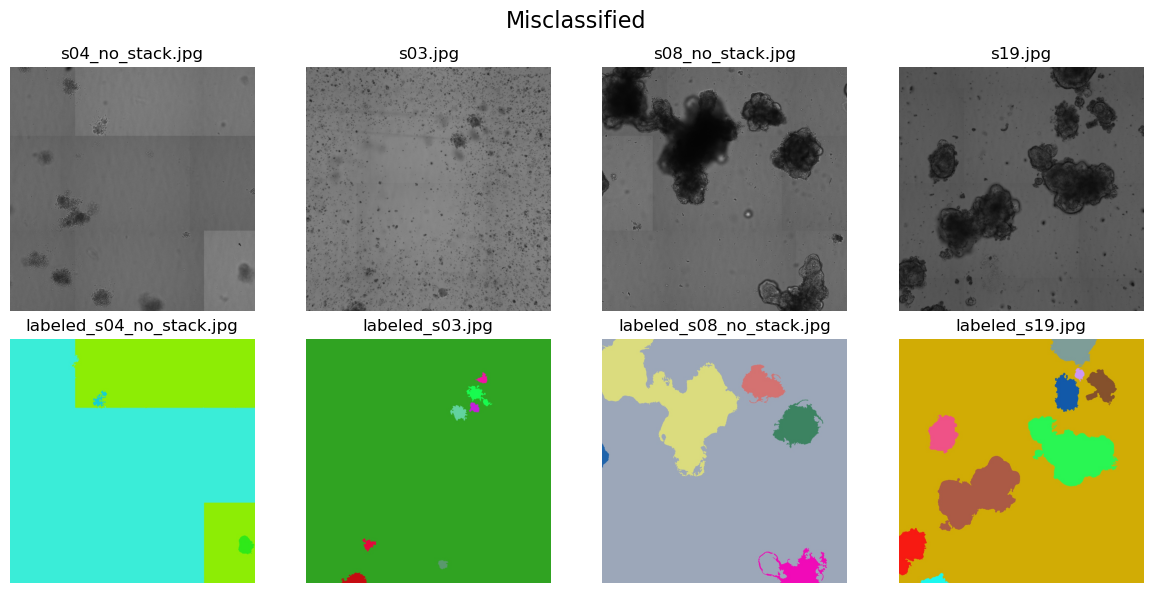

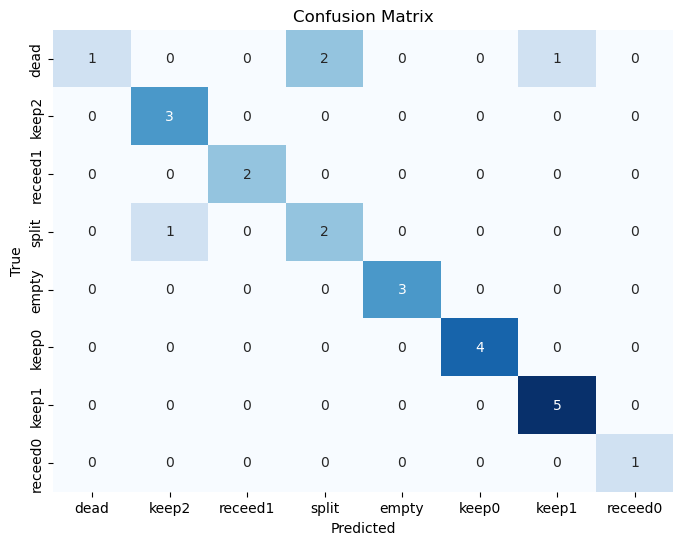

Successfully loaded data from D:/data_for_seg/


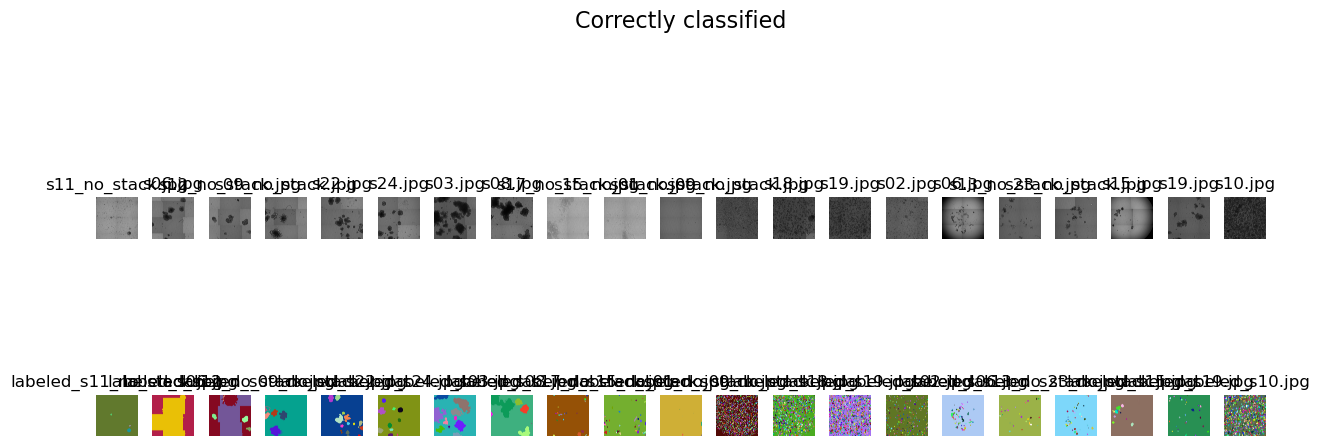

Successfully loaded data from D:/data_for_seg/


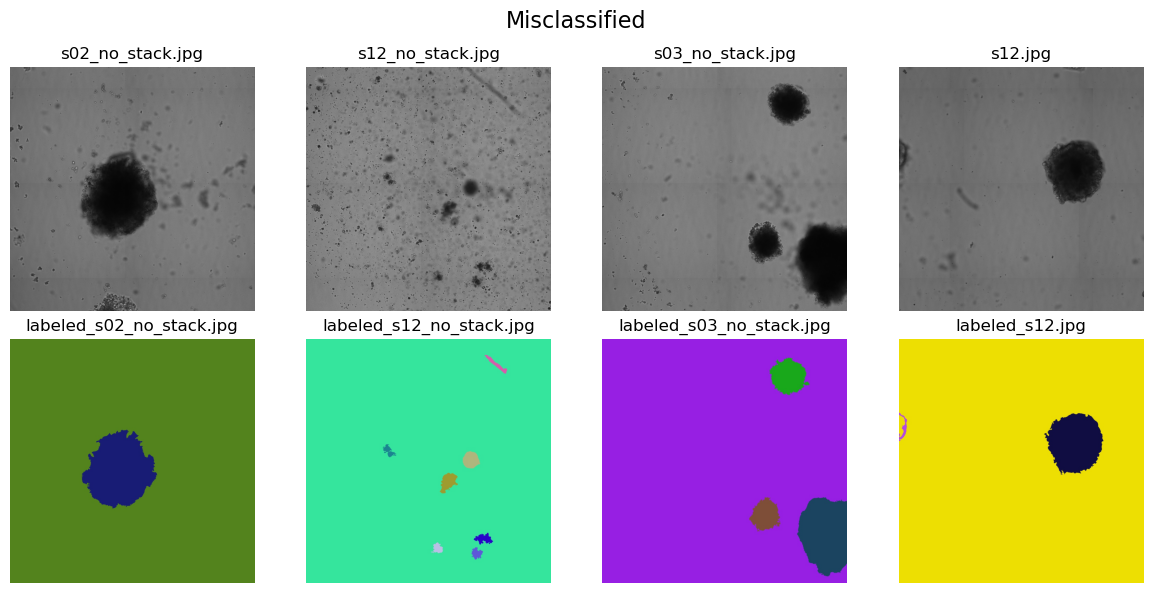

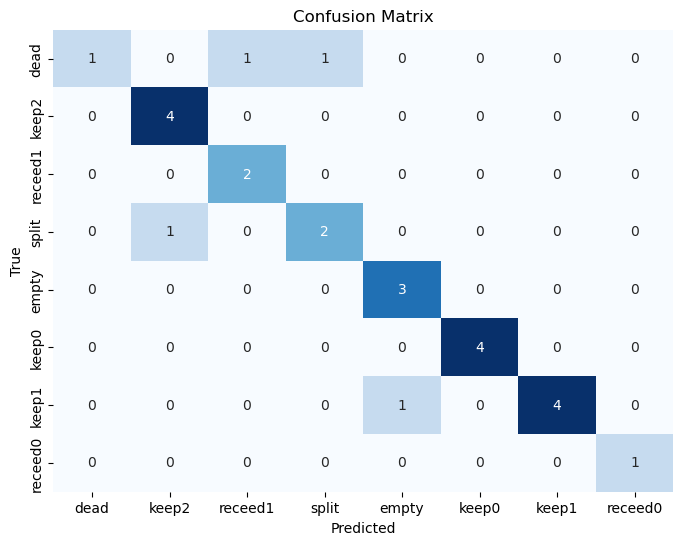

Successfully loaded data from D:/data_for_seg/


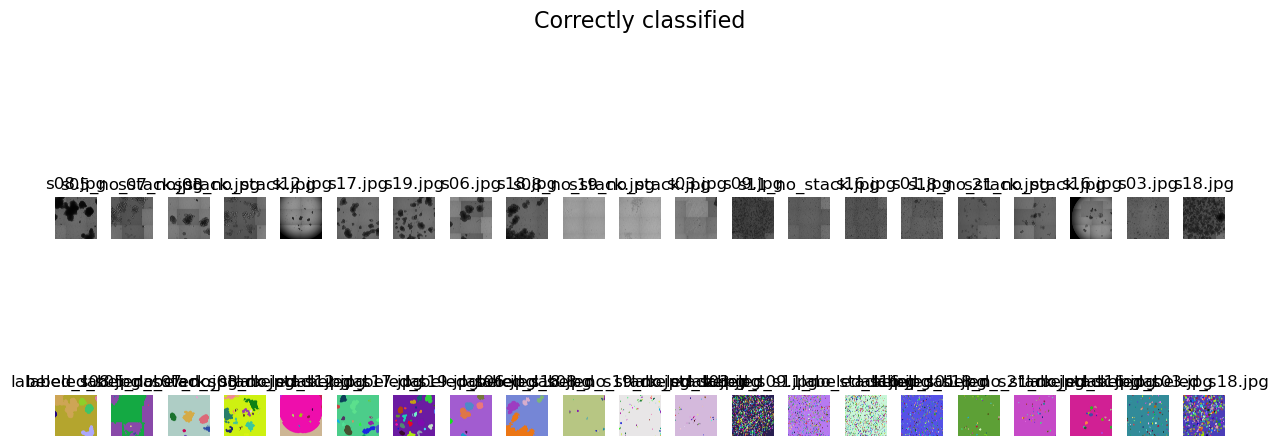

Successfully loaded data from D:/data_for_seg/


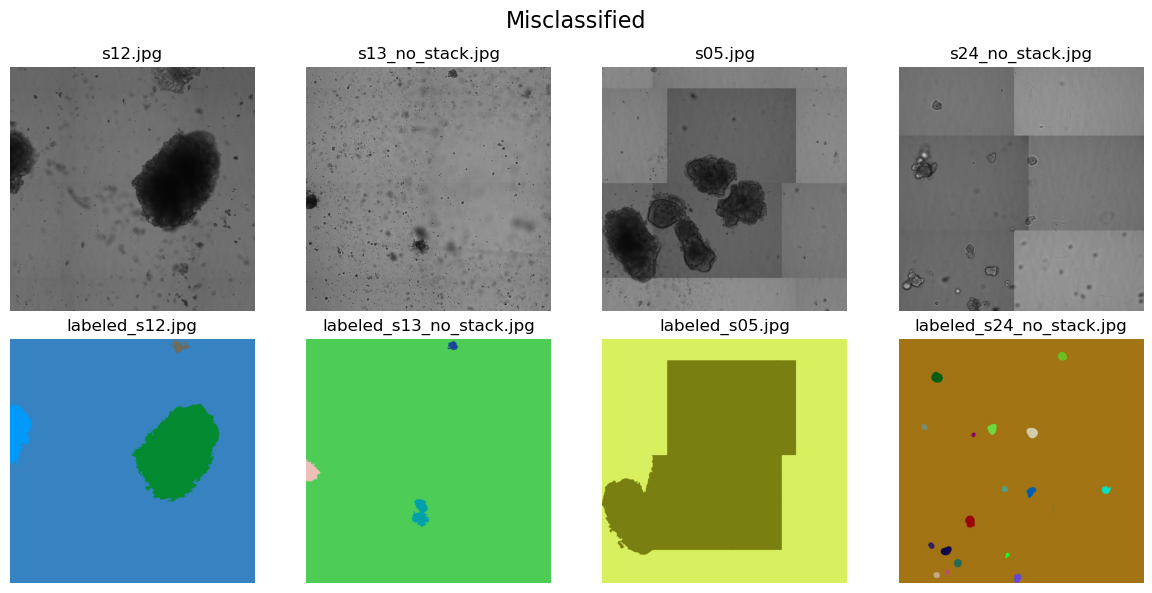

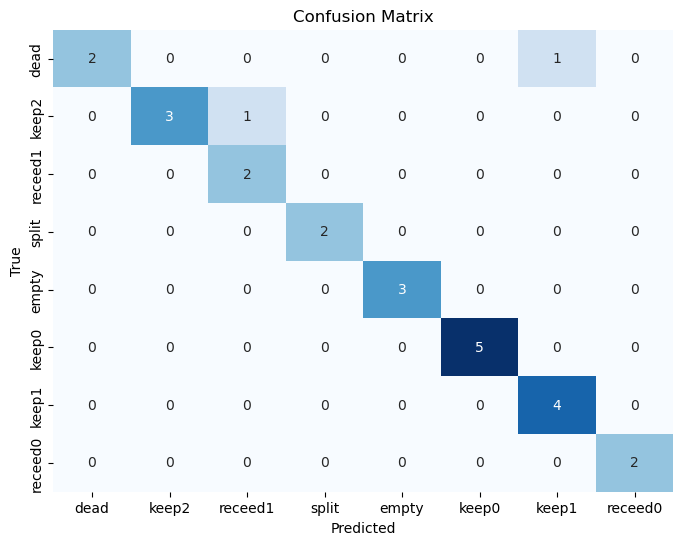

Successfully loaded data from D:/data_for_seg/


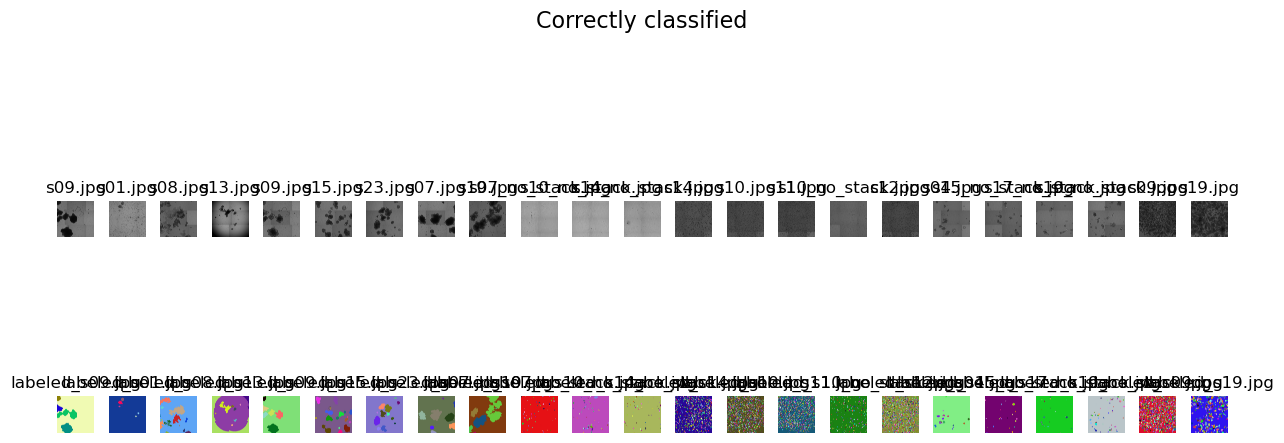

Successfully loaded data from D:/data_for_seg/


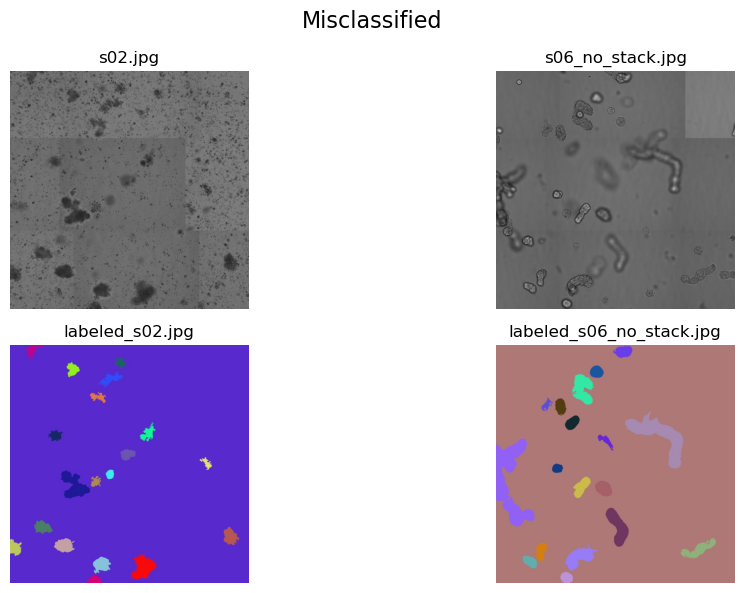

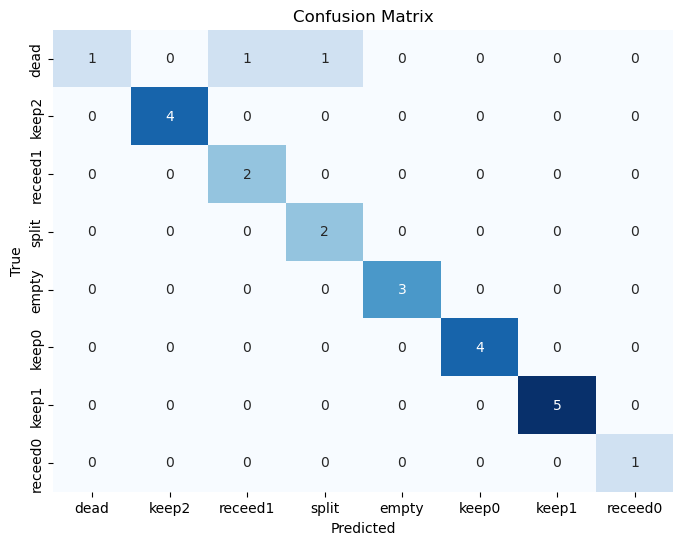

Successfully loaded data from D:/data_for_seg/


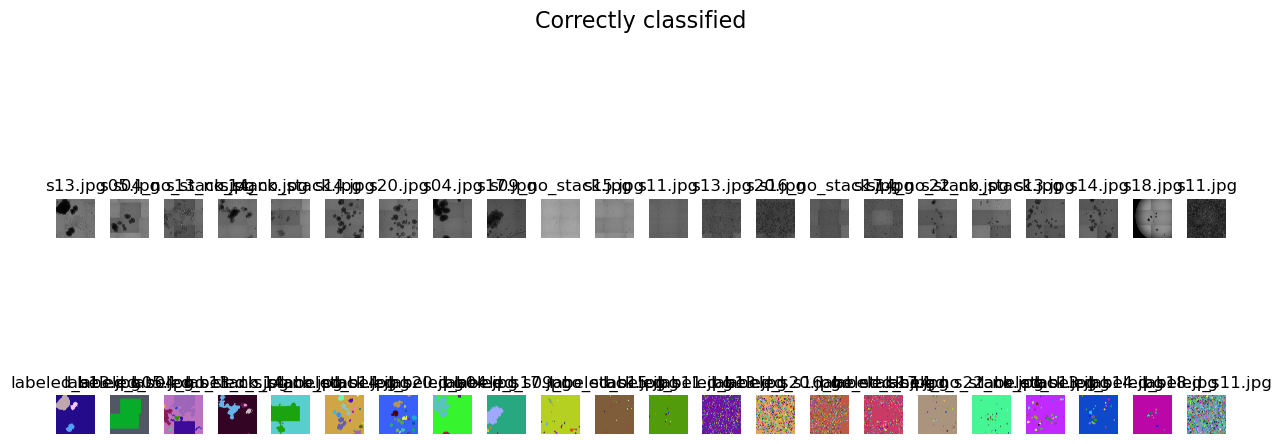

Successfully loaded data from D:/data_for_seg/


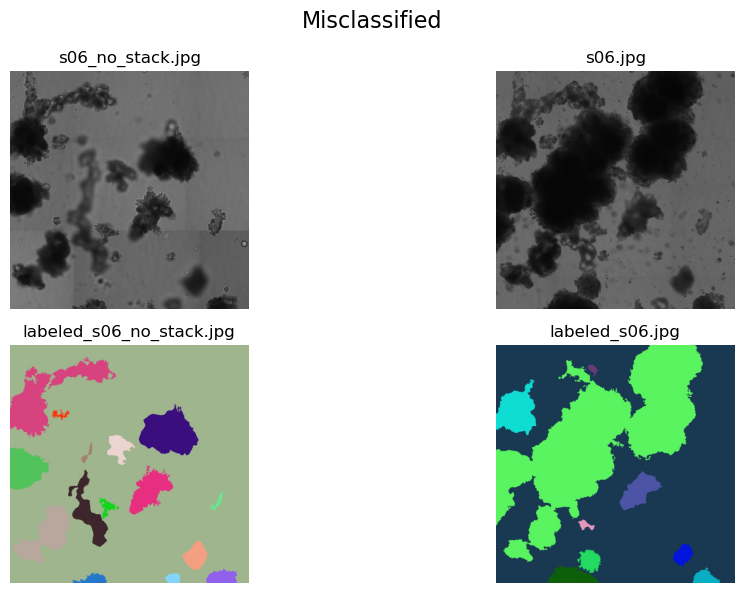

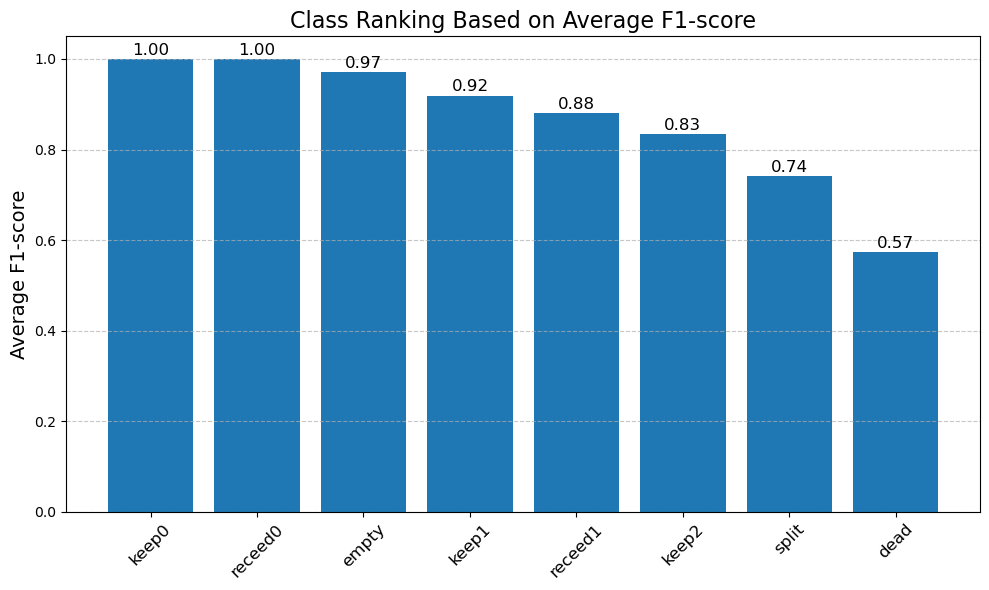

In [6]:
from importlib import reload
import utility
reload(utility)
from utility import load_data, plot_confusion_matrix, plot_average_f1_scores, train_model, get_classification_details, get_hard_disk_path, show_samples
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score

random_state = 42

X, y, unique_labels, label_mapping, data = load_data(get_hard_disk_path())
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
fold_results = []
cumulative_f1_scores = {label: 0 for label in unique_labels}

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Impute missing values with the mean of the column
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    classifier = train_model(X_train, y_train, unique_labels, "RandomForest")
    y_pred = classifier.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, unique_labels)
    wellclassified_samples, misclassified_samples = get_classification_details(y_test, y_pred, data)
    show_samples(get_hard_disk_path(), samples=wellclassified_samples, title="Correctly classified")
    show_samples(get_hard_disk_path(), samples=misclassified_samples, title="Misclassified")

    # Additional operations you had for misclassified and wellclassified samples go here...

    f1_scores_per_class = f1_score(y_test, y_pred, average=None)
    for idx, label in enumerate(unique_labels):
        cumulative_f1_scores[label] += f1_scores_per_class[idx]

average_f1_scores = {label: score/5 for label, score in cumulative_f1_scores.items()} 
ranked_labels = sorted(average_f1_scores, key=average_f1_scores.get, reverse=True)
plot_average_f1_scores(ranked_labels, average_f1_scores)